<a id=contents></a>

# Extraction and cleaning notebook
## Data retrieved from glassdoor.com

Data was extracted via Glassdoor's REST API (documentation here: https://www.glassdoor.com/developer/index.htm). 

[1. Data Inspection](#insp)

[2. Cleaning numerical data](#numerical)

[3. Cleaning categorical data](#categ)

[4. Cleaning text data](#text)

In [31]:

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

import os
import time
import requests as req
from dotenv import load_dotenv
load_dotenv()
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.linear_model import LogisticRegression
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import string

from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
import re
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id=insp ><a/> 

## 1. Data Inspection
    
[LINK to table of contents](#contents)

Now that we have a list of strings, we can check the length, the size of string and what the most frequent terms will be, which'll give us an insight into what we need to clean.

In [24]:
ds_jobs = pd.read_pickle('ds_jobs_raw.pkl')
ds_jobs.head()

,job_url,job_descr
0,https://www.indeed.co.uk/pagead/clk?mo=r&ad=-6...,We would like to reassure all applicants that ...
1,https://www.indeed.co.uk/rc/clk?jk=e96b45c3c7a...,Job Title: Artificial Intelligence – Data Scie...
2,https://www.indeed.co.uk/rc/clk?jk=7548e60a487...,"A career within Forensics Technology services,..."
3,https://www.indeed.co.uk/rc/clk?jk=cae641d93a8...,"White Collar Factory (95009), United Kingdom, ..."
4,https://www.indeed.co.uk/rc/clk?jk=ef47bc3a6fc...,We are a digitally native technology services ...


In [25]:
ds_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_url    510 non-null    object
 1   job_descr  510 non-null    object
dtypes: object(2)
memory usage: 8.1+ KB


In [26]:
ds_jobs.job_descr.nunique()

247

In [27]:
ds_jobs.job_url.nunique()

253

It's very odd that we'd see different numbers of duplicates between the two columnns. Given that it's the text we're most interested in, we're gonna drop duplicates via the job description column first.

In [28]:
ds_jobs.drop_duplicates(inplace=True, subset='job_descr')

In [29]:
ds_jobs.shape

(247, 2)

In [30]:
ds_jobs.head()

,job_url,job_descr
0,https://www.indeed.co.uk/pagead/clk?mo=r&ad=-6...,We would like to reassure all applicants that ...
1,https://www.indeed.co.uk/rc/clk?jk=e96b45c3c7a...,Job Title: Artificial Intelligence – Data Scie...
2,https://www.indeed.co.uk/rc/clk?jk=7548e60a487...,"A career within Forensics Technology services,..."
3,https://www.indeed.co.uk/rc/clk?jk=cae641d93a8...,"White Collar Factory (95009), United Kingdom, ..."
4,https://www.indeed.co.uk/rc/clk?jk=ef47bc3a6fc...,We are a digitally native technology services ...


In [56]:
final_str = []
job_descr_list = [text for text in ds_jobs.job_descr.values]
for job in job_descr_list:
    tokenized_job = tokenizer.tokenize(job)
    for token in tokenized_job:
        final_str.append(token)
        
f_dist = FreqDist([word.lower() for word in final_str])
f_dist

FreqDist({'and': 5750, 'the': 3771, 'data': 2189, 'with': 1557, 'you': 1326, 'for': 1302, 'our': 1149, 'experience': 860, 'will': 801, 'are': 777, ...})

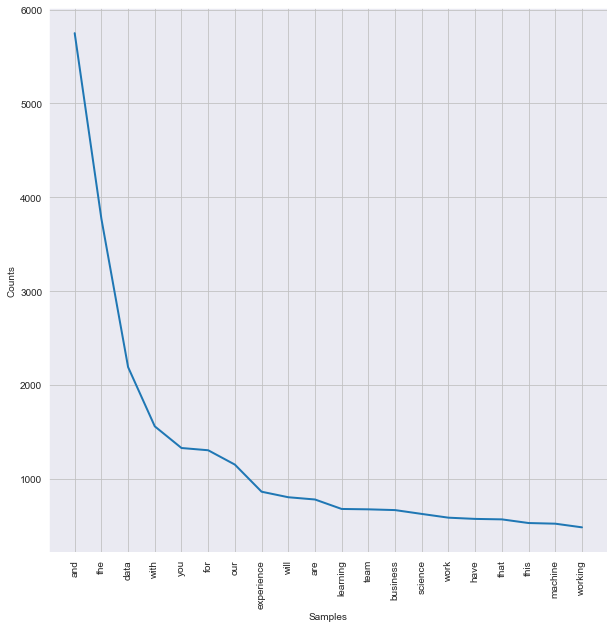

In [78]:
plt.figure(figsize=(10,10))
f_dist.plot(20);

In [ ]:
final_str = []
job_descr_list = [text for text in ds_jobs.job_descr.values]
for job in job_descr_list:
    tokenized_job = tokenizer.tokenize(job)
    for token in tokenized_job:
        if token not in stop_words:
            final_str.append(token)
        
f_dist = FreqDist([word.lower() for word in final_str])

plt.figure(figsize=(10,10))
f_dist.plot(20);

<a id=numerical ><a/> 

## 2. Cleaning numerical data
    
[LINK to table of contents](#contents)

<a id=categ ><a/> 

## 3. Cleaning categorical data
   
[LINK to table of contents](#contents)

<a id=text ><a/> 

## 4. Cleaning text data
    
[LINK to table of contents](#contents)